## Task

1. Define a $2\times2$ or $3\times3$ matrix $A$.
2. Find the characteristic polynomial and minimal polynomial.
3. Use the Cayley-Hamilton theorem to express $e^{At}$ as a polynomial in $A$.
4. Compare the result with `scipy.linalg.expm`.

$$ \dot{X} = \mathbf{A}X $$

## 1. Matrix Exponential definition

The matrix exponential is defined as the infinite series:
$$ e^{at} = 1 + at + \frac{(at)^2}{2!} + \frac{(at)^3}{3!} + \cdots = \sum_{n=0}^{\infty} \frac{(at)^n}{n!} $$
$$ \downarrow \text{replace scalar } a \text{ with matrix } A $$
$$ e^{At} = I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \cdots = \sum_{n=0}^{\infty} \frac{(At)^n}{n!} $$

Solution guess:
$$ X(t) = e^{At}X(0) = \left(I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \cdots\right)X(0) \tag{1} $$

Differentiating $X(t)$ with respect to $t$:
$$ \dot{X}(t) = A\left(I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \cdots\right)X(0) $$
$$ \dot{X}(t) = A\left(I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \cdots\right)X(0) $$
$$ \dot{X}(t) = A e^{At} X(0) $$
$$ \dot{X}(t) = A X(t) $$

As we can see, the solution guess satisfies the original ODE, confirming that $X(t) = e^{At}X(0)$ is indeed the solution to the system of linear ODEs defined by $\dot{X} = AX$.

## 2. Solution for diagonalizable $A$

If $A$ is diagonalizable, we can write it as:

$$ A = PDP^{-1} $$

$D$ - diagonal matrix containing the eigenvalues of $A$.

$P$ - eigenvector matrix of $A$

Then we can express the matrix exponential as:

$$ e^{At} = e^{PDP^{-1}t} =  I + PDP^{-1}t + \frac{(PDP^{-1}t)^2}{2!} + \frac{(PDP^{-1}t)^3}{3!} + \cdots = $$
$$ = P\left(I + Dt + \frac{(Dt)^2}{2!} + \frac{(Dt)^3}{3!} + \cdots\right)P^{-1} = P e^{Dt} P^{-1} = $$
$$ = P e^{Dt} P^{-1} $$

$$ e^{PDP^{-1}t} = P e^{Dt} P^{-1} $$

Plugging this back into the solution guess:
$$ X(t) = e^{At}X(0) = P e^{Dt} P^{-1} X(0) $$
$$ X(t) = P \begin{bmatrix} e^{\lambda_1 t} & 0 & \cdots & 0 \\ 0 & e^{\lambda_2 t} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & e^{\lambda_n t} \end{bmatrix} P^{-1} X(0) $$

## 2.1 Example for diagonalizable $A$

$$ \dot{X} = A X = \begin{bmatrix} -1 & -2 & 2 \\ 4 & 3 & -4 \\ 0 & -2 & 1 \end{bmatrix} X $$

In [2]:
# ty: ignore
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
from numpy.typing import ArrayLike, NDArray

In [3]:
A = np.array([[-1, -2, 2], [4, 3, -4], [0, -2, 1]])
print("Matrix A:")
print(A)

Matrix A:
[[-1 -2  2]
 [ 4  3 -4]
 [ 0 -2  1]]


In [4]:
U, V = np.linalg.eig(A)

print("\nEigenvalues:")
print(U)

print("\nEigenvectors:")
print(V)

print("\nDiagonalized matrix D:")
print(np.diag(U))


Eigenvalues:
[ 3.  1. -1.]

Eigenvectors:
[[-5.77350269e-01 -7.07106781e-01  0.00000000e+00]
 [ 5.77350269e-01 -2.56395025e-16  7.07106781e-01]
 [-5.77350269e-01 -7.07106781e-01  7.07106781e-01]]

Diagonalized matrix D:
[[ 3.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]


In [5]:
# Reconstructing Diagonalized form
D = np.diag(U)
P = V
P_inv = np.linalg.inv(P)
A_reconstructed = (P @ D @ P_inv).round(decimals=5)  # Rounding for better readability

print("\nReconstructed A from P, D, P^-1:")
print(A_reconstructed)



Reconstructed A from P, D, P^-1:
[[-1. -2.  2.]
 [ 4.  3. -4.]
 [ 0. -2.  1.]]


In [6]:
t = sp.symbols("t")
D_exp = sp.diag(sp.exp(U[0] * t), sp.exp(U[1] * t), sp.exp(U[2] * t))
A_exp = P @ D_exp @ P_inv

print("\nMatrix exponential e^(A*t):")
display(A_exp)


Matrix exponential e^(A*t):


Matrix([
[                                   2.0*exp(1.0*t) - 0.999999999999999*exp(3.0*t),                  1.0*exp(1.0*t) - 1.0*exp(3.0*t),                                    -1.0*exp(1.0*t) + 1.0*exp(3.0*t)],
[7.25194642938943e-16*exp(1.0*t) + 0.999999999999999*exp(3.0*t) - 1.0*exp(-1.0*t), 3.62597321469472e-16*exp(1.0*t) + 1.0*exp(3.0*t), -3.62597321469472e-16*exp(1.0*t) - 1.0*exp(3.0*t) + 1.0*exp(-1.0*t)],
[                 2.0*exp(1.0*t) - 0.999999999999999*exp(3.0*t) - 1.0*exp(-1.0*t),                  1.0*exp(1.0*t) - 1.0*exp(3.0*t),                  -1.0*exp(1.0*t) + 1.0*exp(3.0*t) + 1.0*exp(-1.0*t)]])

In [25]:
X0 = np.array([1, 0, 0])  # Initial condition
t_span = (0, 0.5)
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Time points to evaluate the solution

In [20]:
X = A_exp @ sp.Matrix(X0)
display(X)

Matrix([
[                                   2.0*exp(1.0*t) - 0.999999999999999*exp(3.0*t)],
[7.25194642938943e-16*exp(1.0*t) + 0.999999999999999*exp(3.0*t) - 1.0*exp(-1.0*t)],
[                 2.0*exp(1.0*t) - 0.999999999999999*exp(3.0*t) - 1.0*exp(-1.0*t)]])

In [21]:
X_func = sp.lambdify(t, X, modules="numpy")
X_values = X_func(t_eval)

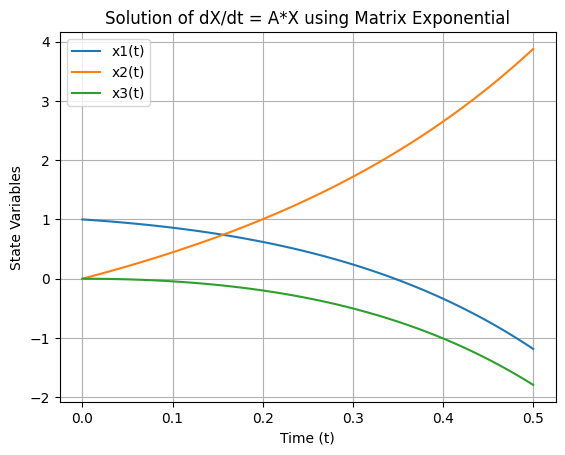

In [22]:
x1_anal = X_values[0, 0]
x2_anal = X_values[1, 0]
x3_anal = X_values[2, 0]

plt.plot(t_eval, x1_anal, label="x1(t)")
plt.plot(t_eval, x2_anal, label="x2(t)")
plt.plot(t_eval, x3_anal, label="x3(t)")

plt.title("Solution of dX/dt = A*X using Matrix Exponential")
plt.xlabel("Time (t)")
plt.ylabel("State Variables")
plt.legend()
plt.grid()

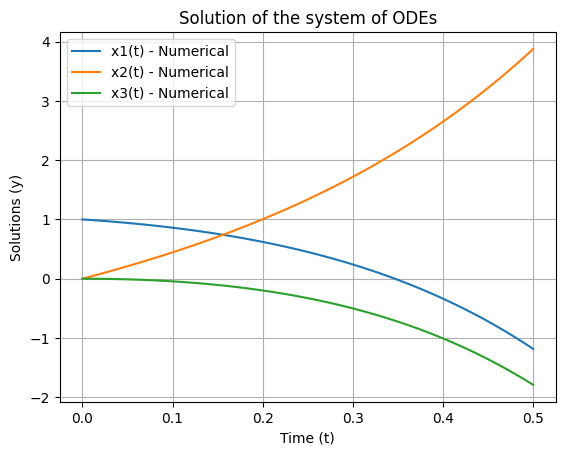

In [27]:
def system(t: float, y: ArrayLike) -> NDArray:
    return A @ y


solution = solve_ivp(system, t_span, X0, t_eval=t_eval)

plt.plot(solution.t, solution.y[0], label="x1(t) - Numerical")
plt.plot(solution.t, solution.y[1], label="x2(t) - Numerical")
plt.plot(solution.t, solution.y[2], label="x3(t) - Numerical")


plt.title("Solution of the system of ODEs")

plt.xlabel("Time (t)")
plt.ylabel("Solutions (y)")
plt.legend()
plt.grid()

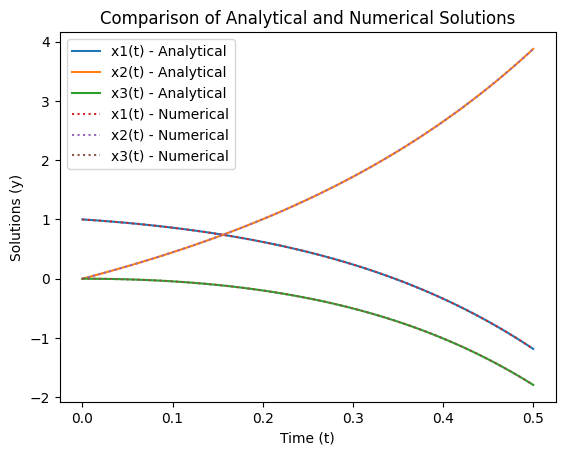

In [29]:
plt.plot(t_eval, x1_anal, label="x1(t) - Analytical")
plt.plot(t_eval, x2_anal, label="x2(t) - Analytical")
plt.plot(t_eval, x3_anal, label="x3(t) - Analytical")

plt.plot(solution.t, solution.y[0], label="x1(t) - Numerical", linestyle="dotted")
plt.plot(solution.t, solution.y[1], label="x2(t) - Numerical", linestyle="dotted")
plt.plot(solution.t, solution.y[2], label="x3(t) - Numerical", linestyle="dotted")

plt.title("Comparison of Analytical and Numerical Solutions")
plt.xlabel("Time (t)")
plt.ylabel("Solutions (y)")
plt.legend()

## Solution for non-diagonalizable $A$

$$ A = D + N $$
$D$ - diagonalizable matrix containing the eigenvalues of $A$.
$N$ - nilpotent matrix (strictly upper triangular)

Nilpotent matrix $N$ and diagonalizable matrix $D$ commute, so we can write:
$$ ND = DN $$

Then we can express the matrix exponential as:
$$ e^{At} = e^{(D + N)t} = e^{Dt} e^{Nt} $$

$$ e^{Nt} = I + Nt + \frac{(Nt)^2}{2!} + \frac{(Nt)^3}{3!} + \cdots $$

Since $N$ is nilpotent, $N^k = 0$ for some $k$, so the series for $e^{Nt}$ terminates after a finite number of terms, making it easier to compute.

$$ e^{At} = e^{Dt} e^{Nt} $$
$$ X(t) = e^{At}X(0) = e^{Dt} e^{Nt} X(0) $$
$$ X(t) = e^{Dt} \left(I + Nt + \frac{(Nt)^2}{2!} + \cdots\right) X(0) $$